In [12]:
import numpy as np
import os     

import pandas as pd
import matplotlib.pyplot as plt
     
import seaborn as sns
%matplotlib inline
     

In [13]:
data_dir = 'C:/Users/User 2/Desktop/cell_images'

In [14]:
os.listdir(data_dir)

['test', 'train']

In [15]:
from matplotlib.image import imread

In [16]:
train_path = data_dir + '/train/'
test_path = data_dir + '/test/'

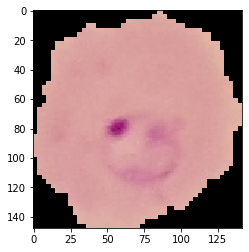

In [17]:
plt.imshow(imread(train_path+'parasitized/'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'))

In [18]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path+'/uninfected'):
    
    if image_filename[-3:] == 'png':
        img = imread(train_path+'/uninfected'+'/'+image_filename)
        d1,d2,colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

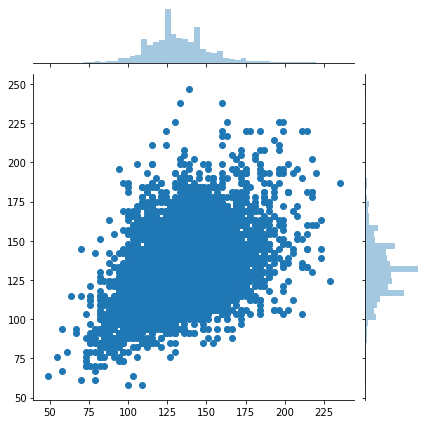

In [24]:
sns.jointplot(dim1,dim2)

In [26]:
np.mean(dim1),np.mean(dim2)

(131.64820899110507, 131.4041990544114)

In [45]:
image_shape = (130,130,3)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

H:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
H:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
H:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
H:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [46]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')

In [31]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [47]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(image_shape), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(image_shape), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(image_shape), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [36]:
batch_size=8

In [48]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb', batch_size=8, class_mode='binary')

Found 24958 images belonging to 2 classes.


In [49]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', batch_size=8, class_mode='binary', shuffle=False)

Found 2600 images belonging to 2 classes.


In [50]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen,
          callbacks=[early_stop])

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model = load_model('malaria_detector.h5')

In [52]:
model.evaluate_generator(test_image_gen)

[3.074968625458244, 0.50076926]